In [1]:
### Ejemeplo de T-Test de una muestra
### Ejemeplo de T-Test de dos muestra
### Ejemeplo de T-Test pareado
## ANova
## Independencia de datos cualitativos

In [2]:
## Librerias
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import math

In [3]:
np.random.seed(1234)

In [4]:
poblacion1=ss.poisson.rvs(loc=18,mu=35,size=450000)
poblacion2=ss.poisson.rvs(loc=18,mu=15,size=150000)

In [5]:
Espanya=np.concatenate((poblacion1,poblacion2))

In [6]:
granada1=ss.poisson.rvs(loc=18,mu=34,size=4500)
granada2=ss.poisson.rvs(loc=18,mu=14,size=1500)
Granada=np.concatenate((granada1,granada2))

In [7]:
print(Espanya.mean())
print(Granada.mean())

47.985978333333335
46.965666666666664


$$H_0 :   \mu_{G}=\mu_{ES}$$
$$H_1 : \mu_{G} \neq \mu_{ES}$$

In [8]:
estadistico,pvalor=ss.ttest_1samp(Granada,Espanya.mean())

In [9]:
if pvalor<=0.05:
    print("Rechazamos la ****")
else:
    print("Aceptamos la ***")

Rechazamos la ****


In [10]:
Madrid1=ss.poisson.rvs(loc=18,mu=37,size=120)
Madrid2=ss.poisson.rvs(loc=18,mu=13,size=80)
Madrid=np.concatenate((Madrid1,Madrid2))

In [11]:
Madrid.mean()

44.915

In [12]:
ss.ttest_ind(Granada,Madrid,equal_var=False)

Ttest_indResult(statistic=2.304829181111661, pvalue=0.02216287707923899)

$$ H_0 : \mu_{Gr} \leq \mu_{Ma}$$
$$ H_1 : \mu_{Gr} > \mu_{Ma}$$

In [13]:
ss.ttest_ind(Granada,Madrid,equal_var=False,alternative="greater")

Ttest_indResult(statistic=2.304829181111661, pvalue=0.011081438539619496)

In [14]:
## T-test Pareado
peso_precovid=ss.norm.rvs(scale=30,loc=100,size=1000)
peso_postcovid=peso_precovid+ss.norm.rvs(scale=10,loc=1.25,size=1000)

In [15]:
Pesos=pd.DataFrame({"peso_precovid":peso_precovid,
              "peso_postcovid":peso_postcovid,
              "Diferencia":peso_postcovid-peso_precovid})

In [16]:
Pesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   peso_precovid   1000 non-null   float64
 1   peso_postcovid  1000 non-null   float64
 2   Diferencia      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [17]:
Pesos.describe().T

,count,mean,std,min,25%,50%,75%,max
peso_precovid,1000.0,100.515641,28.779859,13.866641,80.701193,100.090699,120.403068,184.742129
peso_postcovid,1000.0,101.377621,30.890726,12.875712,79.605067,101.555007,122.142846,185.696680
Diferencia,1000.0,0.861981,10.114129,-31.310381,-6.041496,1.040601,7.906247,31.569827


$$ H_0: \mu_{AC} = \mu_{DC} $$
$$ H_1: \mu_{AC} \neq \mu_{DC} $$

In [18]:
ss.ttest_rel(peso_precovid,peso_postcovid,alternative="two-sided")

TtestResult(statistic=-2.695064033684111, pvalue=0.0071556618647929835, df=999)

$$ H_0: \mu_{AC} \leq \mu_{DC} $$
$$ H_1: \mu_{AC} > \mu_{DC} $$

In [19]:
ss.ttest_rel(peso_precovid,peso_postcovid,alternative="greater")

TtestResult(statistic=-2.695064033684111, pvalue=0.9964221690676035, df=999)

$$ H_0: \mu_{AC} \geq \mu_{DC} $$
$$ H_1: \mu_{AC} < \mu_{DC} $$

In [20]:
ss.ttest_rel(peso_precovid,peso_postcovid,alternative="less")

TtestResult(statistic=-2.695064033684111, pvalue=0.0035778309323964918, df=999)

In [21]:
ss.ttest_rel?

Signature:
ss.ttest_rel(
    a,
    b,
    axis=0,
    nan_policy='propagate',
    alternative='two-sided',
    *,
    keepdims=False,
)
Docstring:
Calculate the t-test on TWO RELATED samples of scores, a and b.

This is a test for the null hypothesis that two related or
repeated samples have identical average (expected) values.

Parameters
----------
a, b : array_like
    The arrays must have the same shape.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input NaNs.
    
    - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
      which the  statistic is computed, the corresponding entry of the output
      will be NaN.
    - ``omit``: NaNs will b

### Anova

In [22]:
Peliculas=["IJ","Bat","Marvel","Senor_Anillos","Tenet"]
pelicula_vista=np.random.choice(a=Peliculas,
                                p=[0.1,0.2,0.2,0.15,0.35],
                                size=1000)
voto_Edad=ss.poisson.rvs(loc=9,mu=25,size=1000)

In [23]:
df=pd.DataFrame({"Pelicula":pelicula_vista,
              "Edad":voto_Edad})

In [24]:
df

,Pelicula,Edad
0,Tenet,40
1,Bat,36
2,Bat,30
3,Tenet,32
4,Tenet,38
...,...,...
995,Tenet,28
996,Tenet,35
997,Bat,40
998,Bat,32


In [25]:
grupos=df.groupby('Pelicula').groups

In [26]:
Bat=voto_Edad[grupos["Bat"]]
IJ=voto_Edad[grupos["IJ"]]
Marvel=voto_Edad[grupos["Marvel"]]
Tenet=voto_Edad[grupos["Tenet"]]
Senor_Anillos=voto_Edad[grupos["Senor_Anillos"]]

In [27]:
ss.f_oneway(Senor_Anillos,Bat,Tenet,IJ,Marvel)

F_onewayResult(statistic=0.7656549586137857, pvalue=0.5476717477279003)

$$ H_0: \mu_{0}=\mu_{1}=\ldots=\mu_{n}$$
$$ H_1: \mu_{i}\neq\mu_{j} \text{existe un i que la media es diferente para un j}$$

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
modelo=ols('Edad~Pelicula',data=df).fit()

In [30]:
modelo

In [31]:
sm.stats.anova_lm(modelo,typ=2)

,sum_sq,df,F,PR(>F)
Pelicula,79.417943,4.0,0.765655,0.547672
Residual,25801.718057,995.0,NaN,NaN


In [32]:
IJ_Edad=ss.poisson.rvs(loc=18,mu=35,size=1000)
voto_Edad=np.where(pelicula_vista=="IJ",IJ_Edad,voto_Edad)

In [33]:
df_1=pd.DataFrame({"Pelicula":pelicula_vista,
              "Edad":voto_Edad})

In [34]:
modelo=ols('Edad~Pelicula',data=df_1).fit()

In [35]:
sm.stats.anova_lm(modelo,typ=2)

,sum_sq,df,F,PR(>F)
Pelicula,26447.270443,4.0,255.61203,4.799015e-151
Residual,25737.280557,995.0,NaN,NaN


In [55]:
print('IJ_Edad-Bat')
print('Two sided: {}'.format(ss.ttest_ind(IJ_Edad,Bat,equal_var=False,alternative="two-sided")))
print('Greater: {}'.format(ss.ttest_ind(IJ_Edad,Bat,equal_var=False,alternative="greater")))
print('Less: {}'.format(ss.ttest_ind(IJ_Edad,Bat,equal_var=False,alternative="less")))

IJ_Edad-Bat
Two sided: Ttest_indResult(statistic=47.557506011361895, pvalue=1.637028858212017e-151)
Greater: Ttest_indResult(statistic=47.557506011361895, pvalue=8.185144291060085e-152)
Less: Ttest_indResult(statistic=47.557506011361895, pvalue=1.0)


In [56]:
print('IJ_Edad-Marvel')
print('Two sided: {}'.format(ss.ttest_ind(IJ_Edad,Marvel,equal_var=False,alternative="two-sided")))
print('Greater: {}'.format(ss.ttest_ind(IJ_Edad,Marvel,equal_var=False,alternative="greater")))
print('Less: {}'.format(ss.ttest_ind(IJ_Edad,Marvel,equal_var=False,alternative="less")))

IJ_Edad-Marvel
Two sided: Ttest_indResult(statistic=45.89366211461949, pvalue=8.459873589382852e-141)
Greater: Ttest_indResult(statistic=45.89366211461949, pvalue=4.229936794691426e-141)
Less: Ttest_indResult(statistic=45.89366211461949, pvalue=1.0)


In [57]:
print('IJ_Edad-Señor_Anillos')
print('Two sided: {}'.format(ss.ttest_ind(IJ_Edad,Senor_Anillos,equal_var=False,alternative="two-sided")))
print('Greater: {}'.format(ss.ttest_ind(IJ_Edad,Senor_Anillos,equal_var=False,alternative="greater")))
print('Less: {}'.format(ss.ttest_ind(IJ_Edad,Senor_Anillos,equal_var=False,alternative="less")))

IJ_Edad-Señor_Anillos
Two sided: Ttest_indResult(statistic=44.85553552159098, pvalue=6.548878205061669e-123)
Greater: Ttest_indResult(statistic=44.85553552159098, pvalue=3.2744391025308344e-123)
Less: Ttest_indResult(statistic=44.85553552159098, pvalue=1.0)


In [58]:
print('IJ_Edad-Tenet')
print('Two sided: {}'.format(ss.ttest_ind(IJ_Edad,Tenet,equal_var=False,alternative="two-sided")))
print('Greater: {}'.format(ss.ttest_ind(IJ_Edad,Tenet,equal_var=False,alternative="greater")))
print('Less: {}'.format(ss.ttest_ind(IJ_Edad,Tenet,equal_var=False,alternative="less")))

IJ_Edad-Tenet
Two sided: Ttest_indResult(statistic=53.835762186217806, pvalue=1.2984998672637979e-247)
Greater: Ttest_indResult(statistic=53.835762186217806, pvalue=6.492499336318989e-248)
Less: Ttest_indResult(statistic=53.835762186217806, pvalue=1.0)


In [59]:
print('Bat-Marvel')
print('Two sided: {}'.format(ss.ttest_ind(Bat,Marvel,equal_var=False,alternative="two-sided")))
print('Greater: {}'.format(ss.ttest_ind(Bat,Marvel,equal_var=False,alternative="greater")))
print('Less: {}'.format(ss.ttest_ind(Bat,Marvel,equal_var=False,alternative="less")))

Bat-Marvel
Two sided: Ttest_indResult(statistic=-0.8625702231697726, pvalue=0.3888880045769002)
Greater: Ttest_indResult(statistic=-0.8625702231697726, pvalue=0.8055559977115498)
Less: Ttest_indResult(statistic=-0.8625702231697726, pvalue=0.1944440022884501)


In [60]:
print('Bat-Señor_Anillos')
print('Two sided: {}'.format(ss.ttest_ind(Bat,Senor_Anillos,equal_var=False,alternative="two-sided")))
print('Greater: {}'.format(ss.ttest_ind(Bat,Senor_Anillos,equal_var=False,alternative="greater")))
print('Less: {}'.format(ss.ttest_ind(Bat,Senor_Anillos,equal_var=False,alternative="less")))

Bat-Señor_Anillos
Two sided: Ttest_indResult(statistic=-1.4137849498903474, pvalue=0.15829139119133429)
Greater: Ttest_indResult(statistic=-1.4137849498903474, pvalue=0.9208543044043329)
Less: Ttest_indResult(statistic=-1.4137849498903474, pvalue=0.07914569559566714)


In [61]:
print('Bat-Tenet')
print('Two sided: {}'.format(ss.ttest_ind(Bat,Tenet,equal_var=False,alternative="two-sided")))
print('Greater: {}'.format(ss.ttest_ind(Bat,Tenet,equal_var=False,alternative="greater")))
print('Less: {}'.format(ss.ttest_ind(Bat,Tenet,equal_var=False,alternative="less")))

Bat-Tenet
Two sided: Ttest_indResult(statistic=-1.4201364023554202, pvalue=0.156254612422157)
Greater: Ttest_indResult(statistic=-1.4201364023554202, pvalue=0.9218726937889214)
Less: Ttest_indResult(statistic=-1.4201364023554202, pvalue=0.0781273062110785)


In [62]:
print('Bat-Tenet')
print('Two sided: {}'.format(ss.ttest_ind(Marvel,Senor_Anillos,equal_var=False,alternative="two-sided")))
print('Greater: {}'.format(ss.ttest_ind(Marvel,Senor_Anillos,equal_var=False,alternative="greater")))
print('Less: {}'.format(ss.ttest_ind(Marvel,Senor_Anillos,equal_var=False,alternative="less")))

Bat-Tenet
Two sided: Ttest_indResult(statistic=-0.5511340460811809, pvalue=0.5818925868481946)
Greater: Ttest_indResult(statistic=-0.5511340460811809, pvalue=0.7090537065759028)
Less: Ttest_indResult(statistic=-0.5511340460811809, pvalue=0.2909462934240973)


In [63]:
print('Marvel-Tenet')
print('Two sided: {}'.format(ss.ttest_ind(Marvel,Tenet,equal_var=False,alternative="two-sided")))
print('Greater: {}'.format(ss.ttest_ind(Marvel,Tenet,equal_var=False,alternative="greater")))
print('Less: {}'.format(ss.ttest_ind(Marvel,Tenet,equal_var=False,alternative="less")))

Marvel-Tenet
Two sided: Ttest_indResult(statistic=-0.4587068783046131, pvalue=0.6466790570879457)
Greater: Ttest_indResult(statistic=-0.4587068783046131, pvalue=0.6766604714560271)
Less: Ttest_indResult(statistic=-0.4587068783046131, pvalue=0.32333952854397285)


In [64]:
print('Señor_Anillos-Tenet')
print('Two sided: {}'.format(ss.ttest_ind(Senor_Anillos,Tenet,equal_var=False,alternative="two-sided")))
print('Greater: {}'.format(ss.ttest_ind(Senor_Anillos,Tenet,equal_var=False,alternative="greater")))
print('Less: {}'.format(ss.ttest_ind(Senor_Anillos,Tenet,equal_var=False,alternative="less")))

Señor_Anillos-Tenet
Two sided: Ttest_indResult(statistic=0.15367699433669477, pvalue=0.8779511914312397)
Greater: Ttest_indResult(statistic=0.15367699433669477, pvalue=0.43897559571561984)
Less: Ttest_indResult(statistic=0.15367699433669477, pvalue=0.56102440428438)


### solucion


* hacer parejas
    * sin repeticion o misma   
    
* test independiente, no estan relacionadas las variables

* pvalor>0.05 no se acepta
* si pvalor < 0.05>

### especificaciones

* lista vacia para guardar parejas


In [66]:
Peliculas

['IJ', 'Bat', 'Marvel', 'Senor_Anillos', 'Tenet']

In [67]:
# parejas

#Peliculas=['IJ', 'Bat', 'Marvel', 'Senor_Anillos', 'Tenet']

parejas=[]

for x in range(4):
    for y in range(x+1,5):
        parejas.append((Peliculas[x],Peliculas[y]))

In [68]:
parejas

[('IJ', 'Bat'),
 ('IJ', 'Marvel'),
 ('IJ', 'Senor_Anillos'),
 ('IJ', 'Tenet'),
 ('Bat', 'Marvel'),
 ('Bat', 'Senor_Anillos'),
 ('Bat', 'Tenet'),
 ('Marvel', 'Senor_Anillos'),
 ('Marvel', 'Tenet'),
 ('Senor_Anillos', 'Tenet')]

In [74]:
len(parejas)

10

In [79]:
# ttest_ind devuelve un array, con estadistico y pvalor
# ss.ttest_ind(...)[0] -> primer valor del array, estadístico
# ss.ttest_ind(...)[1] -> segundo valor del array, pvalor


for peli1, peli2 in parejas:
   estadistico,pvalor=ss.ttest_ind(voto_Edad[grupos[peli1]], 
                 voto_Edad[grupos[peli2]],
                equal_var=False )
   
   if pvalor<0.05:
      print(peli1,'-',peli2)

IJ - Bat
IJ - Marvel
IJ - Senor_Anillos
IJ - Tenet


In [80]:
# hay otra manera para no tener que hacer las parejas

# MULTICOMPARACION

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [83]:
tukey=pairwise_tukeyhsd(voto_Edad, pelicula_vista, alpha=0.05)

In [84]:
tukey.summary()

#si reject = False, se acepta la hipotesis nula

group1,group2,meandiff,p-adj,lower,upper,reject
Bat,IJ,19.3946,0.0,17.5673,21.2219,True
Bat,Marvel,0.4308,0.9141,-0.9511,1.8128,False
Bat,Senor_Anillos,0.7097,0.6721,-0.7478,2.1671,False
Bat,Tenet,0.6394,0.6011,-0.573,1.8518,False
IJ,Marvel,-18.9638,0.0,-20.8078,-17.1198,True
IJ,Senor_Anillos,-18.6849,0.0,-20.5861,-16.7837,True
IJ,Tenet,-18.7552,0.0,-20.4758,-17.0347,True
Marvel,Senor_Anillos,0.2788,0.9858,-1.1995,1.7572,False
Marvel,Tenet,0.2085,0.9907,-1.0289,1.446,False
Senor_Anillos,Tenet,-0.0703,0.9999,-1.3915,1.2509,False


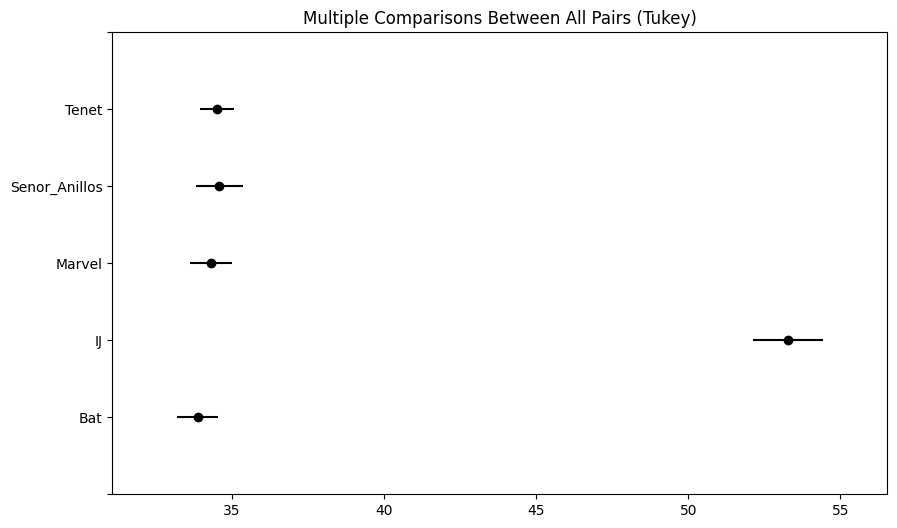

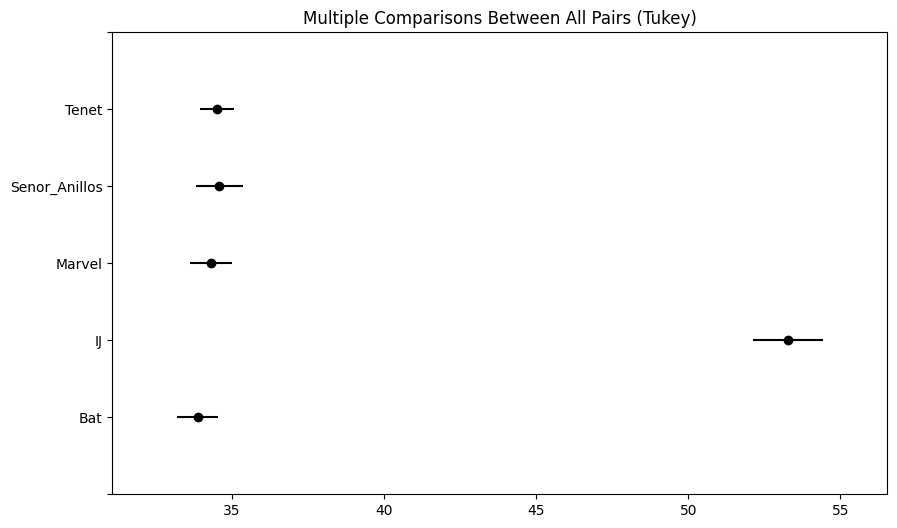

In [85]:
tukey.plot_simultaneous()